In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline  
import matplotlib.pyplot as plt




In [2]:
# 二、Get the Data
# 2.Download the Data

csv_path=os.path.join("D:\Code\Python\Advanced Machine Learning Project\cardio_dataset.csv")
cardio_dataset=pd.read_csv(csv_path)

In [3]:
# 3.Take a quick look at the data structure

cardio_dataset.head

<bound method NDFrame.head of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
5          8  21914       1     151    67.0    120     80            2     2   
6          9  22113       1     157    93.0    130     80            3     1   
7         12  22584       2     178    95.0    130     90            3     3   
8         13  17668       1     158    71.0    110     70            1     1   
9         14  19834       1     164    68.0    110     60            1     1   
10        15  22530       1     169    80.0    120     80            1     1   
11        

In [4]:
cardio_dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
#find out what categories exist and how many people belong to each category
cardio_dataset["smoke"].value_counts() 

0    63831
1     6169
Name: smoke, dtype: int64

In [6]:
# show the summary of the numerical attributes
# std--standard deviation
cardio_dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


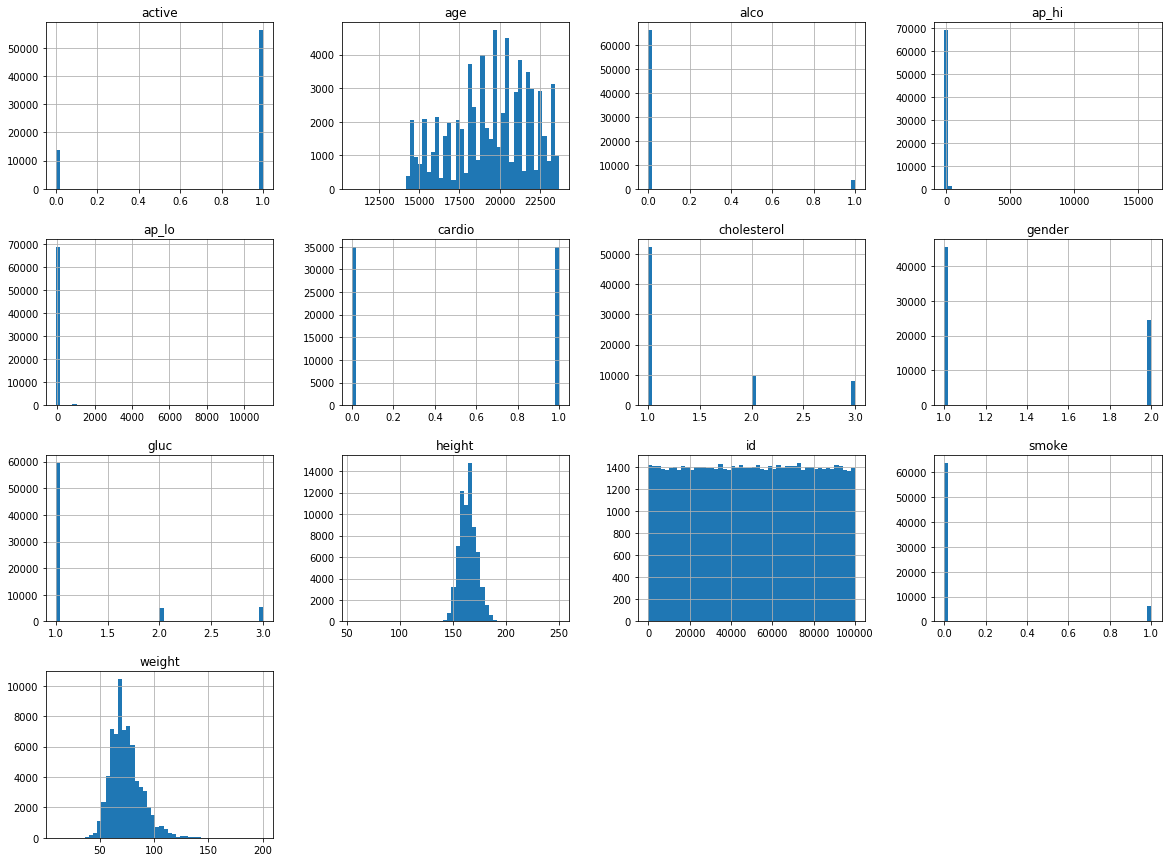

In [7]:
cardio_dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
# 4.Create a test set

# 分测试集的基本原理
# # Create a test set
# # import numpy as np

# def split_train_test(data, test_ratio):
#     # 洗牌指数——随机排列（随机排列的数的多少）。如（10）——随机排列0~9
#     # 返回的是array
#     shuffled_indices = np.random.permutation(len(data))
    
#     # The int() function converts the specified(指定) value into an integer number.
#     # 规则：输入2.99，输出2
#     test_set_size = int(len(data)*test_ratio)
    
#     # [:a]--取数组的前a个；[a:]--取数组除前a个的其他数
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
    
#     # 分配对应位置上的样本到指定的集合
#     return data.iloc[train_indices],data.iloc[test_indice]

# 缺点：
# 1.if you run the program again, it will generate a different test set!
#   Solution: 在第一次运行时保存测试集；set random number generator's seed.
#   但如果数据集有更新这些方法都会崩


In [9]:
# 三、Discover and Visualize the Data to Gain Insights


# 0.make a copy
cardio = cardio_dataset.copy()

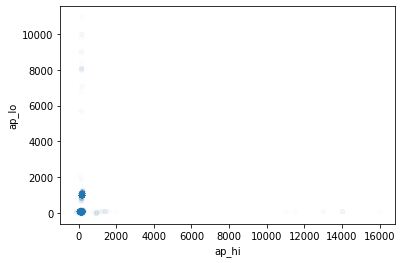

In [10]:
# 1.Visualizing geographical data (data relationship)
cardio.plot(kind="scatter",x="ap_hi",y="ap_lo",alpha=0.01)

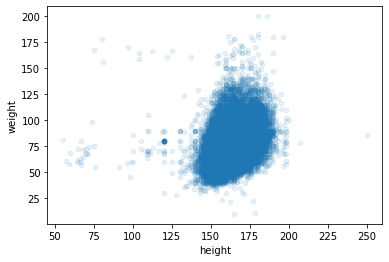

In [11]:
cardio.plot(kind="scatter",x="height",y="weight",alpha=0.1)

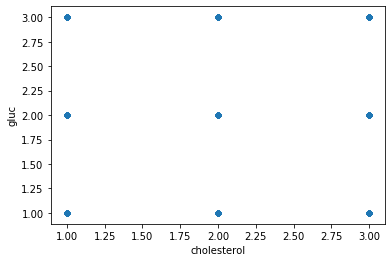

In [12]:
cardio.plot(kind="scatter",x="cholesterol",y="gluc",alpha=0.1)

In [13]:
# 2.Looking for correlations

# calculate correlation coefficient
corr_matrix = cardio.corr()
print(corr_matrix)

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

In [14]:
# 3.Experimenting with Attribute Combinations

# 通过结合两个feature来得到对模型更有用的新的feature
# 例如：结合身高体重得到BMI指数
# BMI是kg/m**2(体重除以身高的平方)，体重用于计算的数会远大于身高，因此BMI会与体重高度线性相关

# 这个操作会“cardio数据集”新增加一个feature
cardio["BMI"]=cardio["weight"]/(cardio["weight"]/100)**2

corr_matrix = cardio.corr()
print(corr_matrix)

# 但是这个数据结合之后，BMI相对于cardio的相关系数（-0.179118）比weight（0.181660）更小。
# 所以这个结合估计可能不太成功，有待考证。（书上是结合之后对target的相关系数更大了，但
# 是书上是回归target，我们的是classification target）

# 由于这个结合不是单纯的相加，因此应该不会造成多重共线性



                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

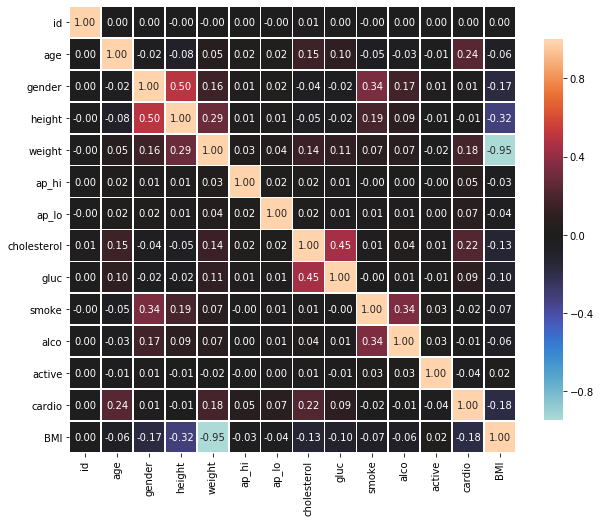

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlations = cardio.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [16]:
# 四、Prepare the Data for Machine Learning Algorithms (EDA重点) 
# 0.预处理数据前把feature和target(label) 分开

cardio = cardio_dataset.drop("cardio",axis=1) #axis=1--按列操作
cardio_targets = cardio_dataset["cardio"].copy

In [17]:
# 1.Data cleaning


# 处理缺失数据

# 扔掉对应样本数据
# cardio.dropna(subset=["对应feature"])
# 扔掉这个feature
# cardio.drop("对应feature",	axis=1)
# 补充失去的数据替换,用该feature的mean
# 1.普通做法
# median=cardio["对应feature"].median()
# cardio["对应feature"].fillna(median,inplace=True)

# 重点：2.sklearn
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median") # 设定填补的数据形式（中位数）
# housing_num=housing.drop("text feature",axis=1)# 去除text feature
# imputer.fit(housing_num)    # 学习每个feature的中位数
# X=imputer.transform(housing_num)  #用中位数填充空白值

# imputer.statistics_  # 将各个feature的中位数存在这
# print(housing_num.median().values) #对应feature的中位数（和statistics_对比）



In [52]:
# 2.Handling Text and Categorical Attributes 

# one-hot encoder for text feature
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
# encoder = OneHotEncoder() # 直接这样会有警告

from sklearn.compose import ColumnTransformer
# http://datascienceopen.com/how-to-use-the-onehotencoder-directly/
# transformer = ColumnTransformer(
#     transformers=[
#         ("OneHot",        # Just a name
#          OneHotEncoder(), # The transformer class
#          [3]              # The column(s) to be applied on.
#          )
#     ],
#     remainder='passthrough' # donot apply anything to the remaining columns
# )



cardio_gluc = cardio["gluc"] # 这里的cardio_gluc是'Series' object，要将其转成array
# 可用命令 cardio_gluc.values将其转换成array



# reshape的用途 https://www.youtube.com/watch?v=3wi0lJPfLUY
# reshape(-1,1)将(70000,)的array转换成(70000,1)的array
cardio_gluc_1hot = ct.fit_transform(cardio_gluc.values.reshape(-1,1))


C:\Users\76819\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [50]:
cardio_gluc.values.reshape(-1,1).shape


(70000, 1)